In [15]:
import signal_processing, data_load
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import skimage.io
import skimage.measure

In [80]:
nr_mels = 32
n_fft = 2048
hop_length = 1024
max_pad_len = 110
max_pad_len_mfcc = 130
nr_seconds = 3.0
nr_mfccs = 45

#### Extragem câte 10 exemple de mfcc, respectiv de melspectrograme:

In [81]:
mfcc1 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/9mQ11vBs1wc/00001.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc2 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/9mQ11vBs1wc/00002.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc3 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/9mQ11vBs1wc/00003.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc4 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/9mQ11vBs1wc/00004.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc5 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/zELwAz2W6hM/00001.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc6 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/zELwAz2W6hM/00002.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc7 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/zELwAz2W6hM/00003.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc8 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/zELwAz2W6hM/00004.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc9 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/zELwAz2W6hM/00005.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
mfcc10 = signal_processing.extract_features_mfcc_seconds('./Dataset/wav/id10001/zELwAz2W6hM/00006.wav', nr_mfccs, max_pad_len_mfcc, nr_seconds)
examples_mfcc = [mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc6, mfcc7, mfcc8, mfcc9, mfcc10]

mel1= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/9mQ11vBs1wc/00001.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel2= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/9mQ11vBs1wc/00002.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel3= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/9mQ11vBs1wc/00003.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel4= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/9mQ11vBs1wc/00004.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel5= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/zELwAz2W6hM/00001.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel6= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/zELwAz2W6hM/00002.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel7= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/zELwAz2W6hM/00003.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel8= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/zELwAz2W6hM/00004.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel9= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/zELwAz2W6hM/00005.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
mel10= signal_processing.extract_features_melspectrogram('./Dataset/wav/id10001/zELwAz2W6hM/00006.wav', n_fft, nr_mels, hop_length, max_pad_len, nr_seconds)
examples_mel = [mel1, mel2, mel3, mel4, mel5, mel6, mel7, mel8, mel9, mel10]

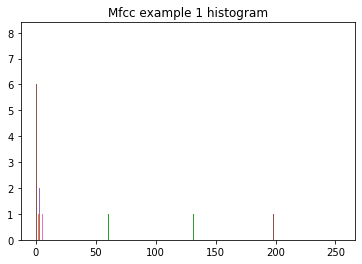

In [57]:
plt.hist(mfcc1, bins=np.arange(255))
plt.title("Mfcc example 1 histogram") 
plt.show()

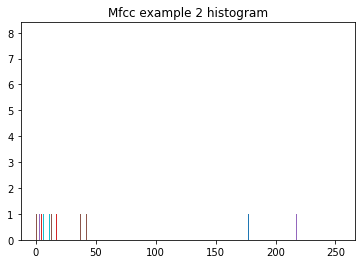

In [58]:
plt.hist(mfcc2, bins=np.arange(255))
plt.title("Mfcc example 2 histogram") 
plt.show()

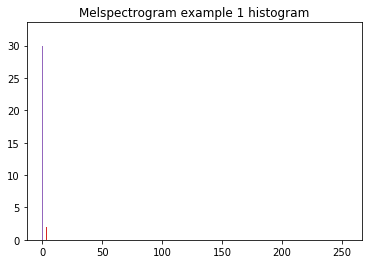

In [76]:
plt.hist(mel1, bins=np.arange(255))
plt.title("Melspectrogram example 1 histogram") 
plt.show()

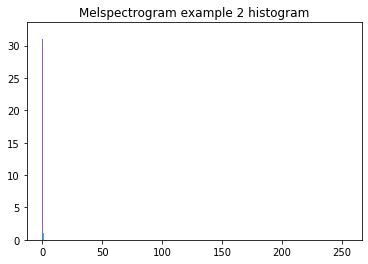

In [77]:
plt.hist(mel2, bins=np.arange(255))
plt.title("Melspectrogram example 2 histogram") 
plt.show()

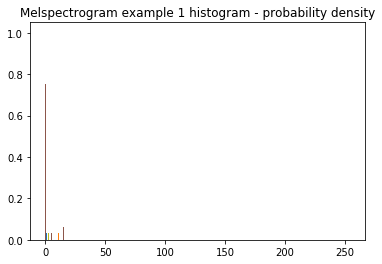

In [78]:
plt.hist(mel1, bins=np.arange(255), density = True)
plt.title("Melspectrogram example 1 histogram - probability density") 
plt.show()

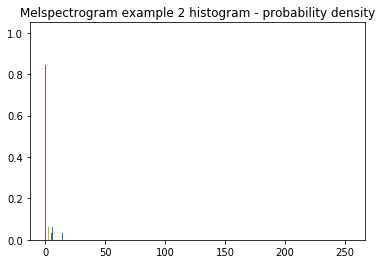

In [79]:
plt.hist(mel2, bins=np.arange(255), density = True)
plt.title("Melspectrogram example 2 histogram - probability density") 
plt.show()

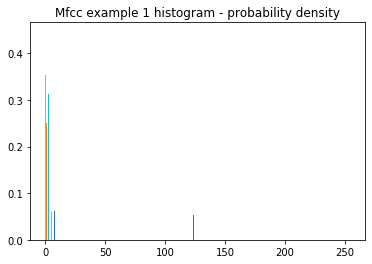

In [63]:
plt.hist(mfcc1, bins=np.arange(255), density = True)
plt.title("Mfcc example 1 histogram - probability density") 
plt.show()

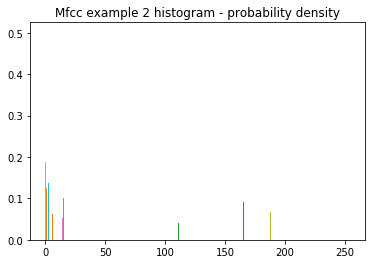

In [64]:
plt.hist(mfcc2, bins=np.arange(255), density = True)
plt.title("Mfcc example 2 histogram - probability density") 
plt.show()

#### Calculăm media entropiilor pentru cele 10 exemple și observăm că media pentru mfcc este mai mare, de aceea modelele care folosesc mfcc sunt mai performante:

In [67]:
entropy_sum_mfcc = 0
for i in range (0, 9):
    data = examples_mfcc[i]
    e = skimage.measure.shannon_entropy(data)
    entropy_sum_mfcc = entropy_sum_mfcc + e
average_entropy_mfcc = entropy_sum_mfcc / 10
print("Average entropy for mfcc examples: ", average_entropy_mfcc)

Average entropy for mfcc examples:  11.262696254319753


In [82]:
entropy_sum_mel = 0
for i in range (0, 9):
    data = examples_mel[i]
    e = skimage.measure.shannon_entropy(data)
    entropy_sum_mel = entropy_sum_mel + e
average_entropy_mel = entropy_sum_mel / 10
print("Average entropy for mel examples: ", average_entropy_mel)

Average entropy for mel examples:  6.740314193068994


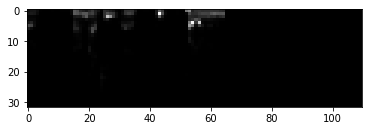

In [83]:
plt.imshow(mel1, cmap=cm.gray)

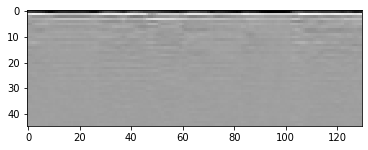

In [75]:
plt.imshow(mfcc1, cmap=cm.gray)